In [1]:
from src.experiments.ease_sweep import run_ease_lambda_sweep

df_results = run_ease_lambda_sweep()
df_results

[DEBUG] Loading full training interactions...
[DEBUG] Loaded 2293985 interactions.
[DEBUG] Creating fold-in/out split...
[DEBUG] Creating fold-in/out split...
[DEBUG] train_in size: 1814872, train_out size: 479113
[DEBUG] train_in size: 1814872, train_out size: 479113
[DEBUG] Total users in train_out: 51749
[DEBUG] Subsampling 3000 users for sweep...
[DEBUG] Users used for sweep: 3000
[DEBUG] Lambda grid: [5, 10, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
[DEBUG] Starting lambda sweep...


Sweeping lambda:   0%|          | 0/24 [00:00<?, ?it/s]


===== λ = 5 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.46s
[DEBUG] Predicting for each test user...


Sweeping lambda:   4%|▍         | 1/24 [00:30<11:31, 30.06s/it]

[DEBUG] Prediction step completed in 27.51s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 10 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.37s
[DEBUG] Predicting for each test user...


Sweeping lambda:   8%|▊         | 2/24 [00:58<10:41, 29.18s/it]

[DEBUG] Prediction step completed in 26.10s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.06s

===== λ = 25 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.01s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.38s
[DEBUG] Predicting for each test user...


Sweeping lambda:  12%|█▎        | 3/24 [01:25<09:52, 28.20s/it]

[DEBUG] Prediction step completed in 24.58s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.04s

===== λ = 50 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.52s
[DEBUG] Predicting for each test user...


Sweeping lambda:  17%|█▋        | 4/24 [01:53<09:18, 27.92s/it]

[DEBUG] Prediction step completed in 24.88s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 75 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.56s
[DEBUG] Predicting for each test user...


Sweeping lambda:  21%|██        | 5/24 [02:22<08:58, 28.34s/it]

[DEBUG] Prediction step completed in 26.44s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 100 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.31s
[DEBUG] Predicting for each test user...


Sweeping lambda:  25%|██▌       | 6/24 [02:50<08:29, 28.30s/it]

[DEBUG] Prediction step completed in 25.85s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 150 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.36s
[DEBUG] Predicting for each test user...


Sweeping lambda:  29%|██▉       | 7/24 [03:18<07:59, 28.23s/it]

[DEBUG] Prediction step completed in 25.65s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 200 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.42s
[DEBUG] Predicting for each test user...


Sweeping lambda:  33%|███▎      | 8/24 [03:45<07:27, 27.96s/it]

[DEBUG] Prediction step completed in 24.87s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.04s

===== λ = 250 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.40s
[DEBUG] Predicting for each test user...


Sweeping lambda:  38%|███▊      | 9/24 [04:12<06:52, 27.47s/it]

[DEBUG] Prediction step completed in 23.92s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.04s

===== λ = 300 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.27s
[DEBUG] Predicting for each test user...


Sweeping lambda:  42%|████▏     | 10/24 [04:38<06:21, 27.22s/it]

[DEBUG] Prediction step completed in 24.32s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.04s

===== λ = 350 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.38s
[DEBUG] Predicting for each test user...


Sweeping lambda:  46%|████▌     | 11/24 [05:04<05:46, 26.67s/it]

[DEBUG] Prediction step completed in 22.97s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 400 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.36s
[DEBUG] Predicting for each test user...


Sweeping lambda:  50%|█████     | 12/24 [05:30<05:17, 26.42s/it]

[DEBUG] Prediction step completed in 23.42s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 450 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.40s
[DEBUG] Predicting for each test user...


Sweeping lambda:  54%|█████▍    | 13/24 [05:56<04:51, 26.48s/it]

[DEBUG] Prediction step completed in 24.13s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 500 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.34s
[DEBUG] Predicting for each test user...


Sweeping lambda:  58%|█████▊    | 14/24 [06:24<04:27, 26.75s/it]

[DEBUG] Prediction step completed in 24.95s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.04s

===== λ = 550 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.43s
[DEBUG] Predicting for each test user...


Sweeping lambda:  62%|██████▎   | 15/24 [06:51<04:01, 26.79s/it]

[DEBUG] Prediction step completed in 24.40s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 600 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.37s
[DEBUG] Predicting for each test user...


Sweeping lambda:  67%|██████▋   | 16/24 [07:18<03:35, 26.98s/it]

[DEBUG] Prediction step completed in 24.96s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 650 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.42s
[DEBUG] Predicting for each test user...


Sweeping lambda:  71%|███████   | 17/24 [07:46<03:09, 27.13s/it]

[DEBUG] Prediction step completed in 24.97s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 700 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.32s
[DEBUG] Predicting for each test user...


Sweeping lambda:  75%|███████▌  | 18/24 [08:12<02:41, 26.98s/it]

[DEBUG] Prediction step completed in 24.23s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 750 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.26s
[DEBUG] Predicting for each test user...


Sweeping lambda:  79%|███████▉  | 19/24 [08:41<02:17, 27.46s/it]

[DEBUG] Prediction step completed in 26.25s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 800 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.28s
[DEBUG] Predicting for each test user...


Sweeping lambda:  83%|████████▎ | 20/24 [09:08<01:49, 27.43s/it]

[DEBUG] Prediction step completed in 24.99s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 850 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.36s
[DEBUG] Predicting for each test user...


Sweeping lambda:  88%|████████▊ | 21/24 [09:36<01:22, 27.49s/it]

[DEBUG] Prediction step completed in 25.20s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 900 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.24s
[DEBUG] Predicting for each test user...


Sweeping lambda:  92%|█████████▏| 22/24 [10:03<00:54, 27.28s/it]

[DEBUG] Prediction step completed in 24.47s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 950 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.20s
[DEBUG] Predicting for each test user...


Sweeping lambda:  96%|█████████▌| 23/24 [10:29<00:27, 27.06s/it]

[DEBUG] Prediction step completed in 24.28s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s

===== λ = 1000 =====
[DEBUG] Building ID mappings...
[DEBUG] ID mappings built in 0.00s
[DEBUG] Building CSR matrix...
[DEBUG] CSR built: shape = (3000, 5404), nnz = 108801
[DEBUG] CSR build time: 0.02s
[DEBUG] Removing zero columns...
[DEBUG] Zero columns: 290
[DEBUG] After filtering: X_train shape = (3000, 5114)
[DEBUG] Zero-column filtering time: 0.00s
[DEBUG] Fitting EASE...
[DEBUG] EASE.fit() completed in 2.15s
[DEBUG] Predicting for each test user...


Sweeping lambda: 100%|██████████| 24/24 [10:56<00:00, 27.33s/it]

[DEBUG] Prediction step completed in 24.20s
[DEBUG] Computing metrics...
[DEBUG] Metrics computed in 0.05s
[DEBUG] Saved sweep results to: ease_lambda_sweep.csv


,ndcg,recall,user_coverage,item_coverage,item_gini,publisher_gini,lambda
0,0.005091,0.006947,1.0,0.166797,0.807280,NaN,5
1,0.005017,0.006898,1.0,0.157607,0.807194,NaN,10
2,0.005274,0.007985,1.0,0.148025,0.814588,NaN,25
3,0.005175,0.007466,1.0,0.136097,0.818118,NaN,50
4,0.005044,0.007330,1.0,0.128666,0.821117,NaN,75
5,0.004970,0.007164,1.0,0.122605,0.822118,NaN,100
6,0.005059,0.007441,1.0,0.116543,0.828361,NaN,150
7,0.004974,0.007332,1.0,0.111850,0.833126,NaN,200
8,0.004945,0.007294,1.0,0.108721,0.837123,NaN,250
9,0.004920,0.007132,1.0,0.105201,0.839427,NaN,300


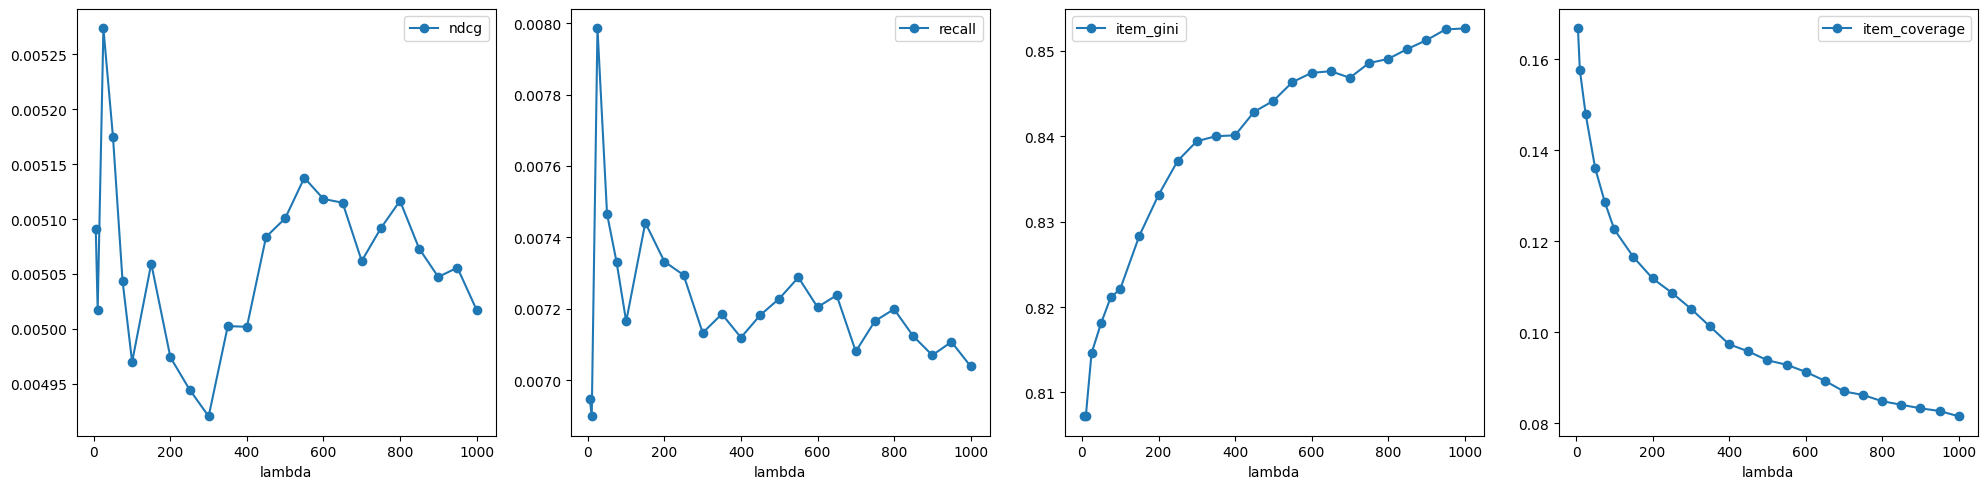

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

df_results.plot(x="lambda", y="ndcg", marker="o", ax=axes[0])
df_results.plot(x="lambda", y="recall", marker="o", ax=axes[1])
df_results.plot(x="lambda", y="item_gini", marker="o", ax=axes[2])
df_results.plot(x="lambda", y="item_coverage", marker="o", ax=axes[3])

plt.tight_layout()
plt.show()

#### Observations
- note: this is based on a subsample of full data (3000 users), this is done for speed. This takes me about 27.33 per iteration, and we tested on 24 lambdas, so it takes about 10 minutes.
- small lambda (0–25): unstable, noise
- medium lambda (100–300): more stable, lower noise
- large lambda (500+): higher item-gini, lower coverage, decreasing ndcg/recall
- best ndcg/recall around lambda=25-150

#### Explanations
- item-gini increase with lambda, because higher lambda values make EASE more popularly biased. Fewer items dominate → gini increases.
- item-coverage decreases with lambda, because EASE favors popular items.

#### Anomalies
- results differ a lot compared to codabench.
    - ndgc: 0.005 vs 0.24
    - recall: 0.008 vs 0.45
- possible reasons:
    - subsampling of users for speed
    - The fold-in / out split is different
        -  codabench uses one holdout per user (likely), we use 80% fold-in-ratio as we did in lecture 2.
## Conclusion
- lambda=25 gives the best recall and best ndgc in this experiment.
- λ=100–300 gives the most stable behavior, good for comparing novelty models later
- I will continue with λ=100.